In [7]:
# 一、数据导入
#导入第三方模块
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
#忽略警告提示
import warnings
warnings.filterwarnings("ignore")

In [9]:
# 导入模块
from sklearn import model_selection
# 导入数据
full = pd.read_csv(r'data.csv')

full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# 由上一步可以看到，TotalCharges应该与MonthlyCharges 一样是float64类型，但数据集中显示为object，所以可能是存在空字符串，进行数据的处理
full['TotalCharges']=full['TotalCharges'].replace(" ", 0).astype("float64")
full['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
# 查看数据有无重复值
print(any(full.duplicated()))

False


In [12]:
# 将数据集拆分为训练集和测试集
train, test = model_selection.train_test_split(full, test_size = 0.2, random_state=1234)
train.info()  #查看训练集的每一列的数据类型，和数据总数
train.isnull().sum().values.sum()
# 可以看出训练数据共有5634行，21列;无缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3486 to 2863
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

0

In [13]:
# 删除test数据集中的Churn变量，用剩下的自变量进行预测
test_X = test.drop(labels = 'Churn', axis = 1)
test.info()
#可见，测试数据共有1409行，21列，有一列Churn需要我们预测。数据无缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 6692 to 2918
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   objec

In [14]:
# 二、了解数据代表的意义
#customerID=>客户编号         
#gender=>性别            
#SeniorCitizen=>老年用户   
#Partner=>配偶用户           
#Dependents=>亲属用户      
#tenure=>在网时长（0-72月）            
#PhoneService=>手机服务       
#MultipleLines=>多线路      
#InternetService=>网络服务   
#OnlineSecurity=>网络安全     
#OnlineBackup=>联机备份      
#DeviceProtection=>设备保护  
#TechSupport=>技术支持        
#StreamingTV=>流媒体电视        
#StreamingMovies=>网络电影   
#Contract=>签订合同方式          
#PaperlessBilling=>电子账单  
#PaymentMethod=>支付方法     
#MonthlyCharges=>月费用    
#TotalCharges=>总费用      
#Churn=>客户流失

In [15]:
# 查看总数据集的信息，进行探索性分析
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
full.info()
#查看有多少缺失数据
full.isnull().sum().values.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0

In [17]:
full.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
full.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [19]:
Rate_Churn = train[train['Churn']=='Yes'].shape[0]/train['Churn'].shape[0] #流失率
No_Churn = 1-Rate_Churn
print(Rate_Churn, No_Churn)

0.2673056443024494 0.7326943556975506


Text(0.5, 1.0, 'Customer Payment Method')

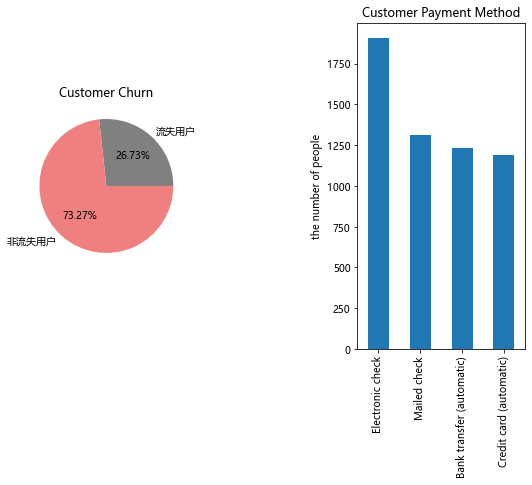

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib.font_manager import FontProperties 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示正负号

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
fig.set_figheight(15)
fig.set_figwidth(15) #set_figwidth() 、 set_figheight()改变图片的大小
plt.subplots_adjust(hspace=0.5, wspace=1)  # wspace, hspace：子图之间的横向间距、纵向间距分别与子图平均宽度、平均高度的比值。

# plt.subplot2grid(shape, location, rowspan, colspan)
# shape：把该参数值规定的网格区域作为绘图区域；
# location：在给定的位置绘制图形，初始位置 (0,0) 表示第1行第1列；
# rowsapan/colspan：这两个参数用来设置让子区跨越几行几列。

plt.subplot2grid((2,3),(0,0))
data = [0.2673056443024494, 0.7326943556975506]
labels = ['流失用户', '非流失用户']
plt.pie(x = data, labels = labels, autopct = "%.2f%%", colors = ['grey', 'lightcoral'])
plt.title(u"Customer Churn")

plt.subplot2grid((2,3),(0,1))
train.PaymentMethod.value_counts().plot(kind="bar")
plt.ylabel(u"the number of people")
plt.title(u"Customer Payment Method")

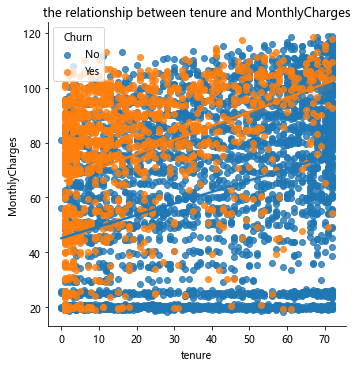

In [21]:
sns.lmplot(x = 'tenure', y='MonthlyCharges', hue = 'Churn', data = train, legend_out=False, truncate=True)
# x轴变量，y轴变量, 指定分组变量， 指定绘图数据集， 将图例呈现在图框内， 根据实际数据范围，对拟合线做截断操作
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges') # 修改x轴与y轴的标签
plt.title('the relationship between tenure and MonthlyCharges')  # 添加标题
plt.show()

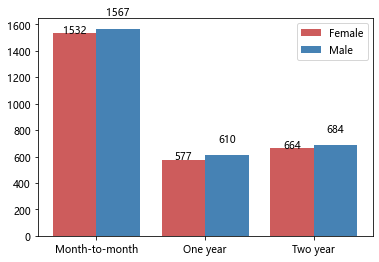

In [22]:
# 签订合同方式和性别的关系
Contract_ways = ['Month-to-month', 'One year', 'Two year']
y1 = train.Contract[train.Contract=='Month-to-month'][train.gender == 'Female'].shape[0]
y2 = train.Contract[train.Contract=='One year'][train.gender == 'Female'].shape[0]
y3 = train.Contract[train.Contract=='Two year'][train.gender == 'Female'].shape[0]
y4 = train.Contract[train.Contract=='Month-to-month'][train.gender == 'Male'].shape[0]
y5 = train.Contract[train.Contract=='One year'][train.gender == 'Male'].shape[0]
y6 = train.Contract[train.Contract=='Two year'][train.gender == 'Male'].shape[0]
Counts_Female = [y1, y2, y3]
Counts_Male = [y4, y5, y6]

# 绘制水平交错条形图
bar_width = 0.4
plt.bar(x = np.arange(len(Contract_ways)), height = Counts_Female, label = 'Female',
        color = 'indianred', width = bar_width)
plt.bar(x = np.arange(len(Contract_ways))+bar_width, height = Counts_Male, label = 'Male',
        color = 'steelblue', width = bar_width)
plt.xticks(np.arange(3)+0.2, Contract_ways)  # 添加刻度标签（向右偏移0.2）

# 在每一个矩形上面显示人数
#enumerate(iteration, start)函数：第一个返回值为从start参数开始的数，第二个参数为iteration参数中的值。
for i, j in enumerate(Counts_Female): # j是从Counts_Female里面的元素开始遍历，i默认是从0开始
    plt.text(i, j, '%s' %j, ha='center')
    # plt.text(x, y, s, fontsize, verticalalignment,horizontalalignment,rotation , kwargs)
    # x,y：标签添加的位置，注释文本内容所在位置的横/纵坐标
    # s：标签的符号，字符串格式 ;  horizontalalignment：水平对齐方式

for i,j in enumerate(Counts_Male): # j是从Counts_Male里面的元素开始遍历，i默认是从0开始
    plt.text(i+bar_width, j+100, '%s' %j, ha='center')

plt.legend()  # 添加图例
plt.show()

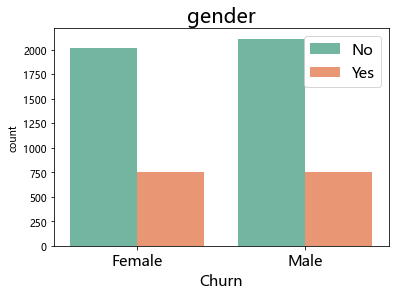

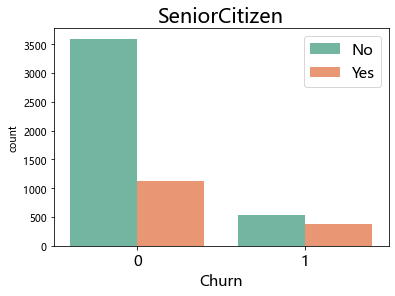

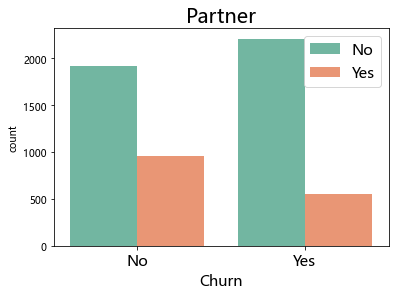

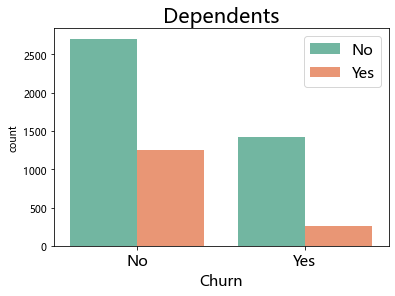

In [23]:
train_Churn = train[train['Churn'] == 'Yes'] #流失客户
   
for i ,j in enumerate(['gender','SeniorCitizen','Partner','Dependents']):
#     sns.countplot():x： x轴上的条形图，以x标签划分统计个数;
#                     hue：在x或y标签划分的同时，再以hue标签划分统计个数
#                     data：用于绘图的数据集
#                     order：分别是对x或y的字段排序，排序的方式为列表
#                     palette：使用不同的调色板
    ax=sns.countplot(x=j,hue='Churn',data=train,palette="Set2",
                     order=train_Churn.groupby(j)['Churn'].value_counts().index.levels[0])
    plt.title(str(j), fontsize=20)
    plt.xlabel('Churn',fontsize=15)
    plt.xticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
    i+=1

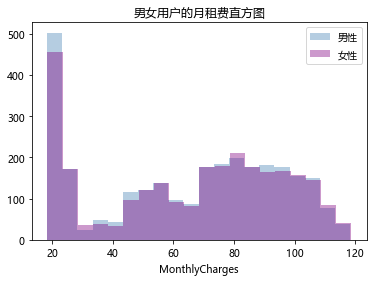

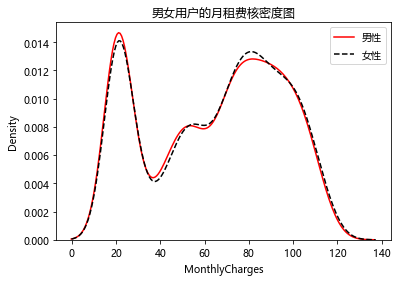

In [24]:
import seaborn as sns
# 取出男性月租费
MonthlyCharges_Male = train.MonthlyCharges[train.gender=='Male']
# 取出女性月租费
MonthlyCharges_Female = train.MonthlyCharges[train.gender=='Female']

# 绘制男女用户月租费的直方图
sns.distplot(MonthlyCharges_Male, bins=20, kde = False,
             hist_kws={'color':'steelblue'}, label='男性')
sns.distplot(MonthlyCharges_Female, bins=20, kde = False, 
             hist_kws={'color':'purple'}, label='女性')
plt.title('男女用户的月租费直方图')

plt.legend()
plt.show()

# 绘制男女用户月租费的核密度图
sns.distplot(MonthlyCharges_Male, hist=False, kde_kws=
             {'color':'red', 'linestyle':'-'}, norm_hist=True, label='男性')
sns.distplot(MonthlyCharges_Female, hist=False, kde_kws=
             {'color':'black', 'linestyle':'--'}, norm_hist=True, label='女性')
plt.title('男女用户的月租费核密度图')
plt.legend()
plt.show()

In [25]:
#四.特征工程
# 1、Sex 性别

# 将性别的值映射为数值
# 男（male）对应数值1，女（female）对应数值0
gender_mapDict={'Male':1, 'Female':0}
#map函数：对Series每个数据应用自定义的函数计算
full['gender']=full['gender'].map(gender_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
# 2、Partner配偶用户    

# 将配偶用户的值映射为数值
# YES对应数值1，NO对应数值0
Partner_mapDict={'Yes':1,'No':0}
#map函数：对Series每个数据应用自定义的函数计算
full['Partner']=full['Partner'].map(Partner_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# 4、Dependents亲属用户

# 将亲属用户的值映射为数值
# YES对应数值1，NO对应数值0
Dependents_mapDict={'Yes':1,'No':0}
#map函数：对Series每个数据应用自定义的函数计算
full['Dependents']=full['Dependents'].map(Dependents_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# 4、PhoneService手机服务    

# 将手机服务的值映射为数值
# YES对应数值1，NO对应数值0
PhoneService_mapDict={'Yes':1,'No':0}
#map函数：对Series每个数据应用自定义的函数计算
full['PhoneService']=full['PhoneService'].map(PhoneService_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# 5、MultipleLines多线路    

# 将多线路的值映射为数值
# NO对应数值0，No phone service对应数值为1，YES对应数值2
MultipleLines_mapDict={'No':0, 'No phone service':1, 'Yes':2}
#map函数：对Series每个数据应用自定义的函数计算
full['MultipleLines']=full['MultipleLines'].map(MultipleLines_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# 6、OnlineSecurity网络安全

# 将网络安全的值映射为数值
# NO对应数值0，No internet service对应数值为1，YES对应数值2
OnlineSecurity_mapDict={'No':0, 'No internet service':1, 'Yes':2}
#map函数：对Series每个数据应用自定义的函数计算
full['OnlineSecurity']=full['OnlineSecurity'].map(OnlineSecurity_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# 7、OnlineBackup联机备份

# 将联机备份的值映射为数值
# NO对应数值0，No internet service对应数值为1，YES对应数值2
OnlineBackup_mapDict={'No':0, 'No internet service':1, 'Yes':2}
#map函数：对Series每个数据应用自定义的函数计算
full['OnlineBackup']=full['OnlineBackup'].map(OnlineBackup_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# 8、DeviceProtection设备保护

# 将设备保护的值映射为数值
# NO对应数值0，No internet service对应数值为1，YES对应数值2
DeviceProtection_mapDict={'No':0, 'No internet service':1, 'Yes':2}
#map函数：对Series每个数据应用自定义的函数计算
full['DeviceProtection']=full['DeviceProtection'].map(DeviceProtection_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,2,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,2,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# 9、TechSupport技术支持

# 将技术支持的值映射为数值
# NO对应数值0，No internet service对应数值为1，YES对应数值2
TechSupport_mapDict={'No':0, 'No internet service':1, 'Yes':2}
#map函数：对Series每个数据应用自定义的函数计算
full['TechSupport']=full['TechSupport'].map(TechSupport_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,2,0,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,0,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,2,2,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
#3.PaymentMethod=>支付方法 
#分类：
#Electronic check 电子支付
#Mailed chech 邮件支付
#Bank transfer（automatic） 银行汇款

In [35]:
#查看该类数据内容
full.groupby("PaymentMethod").Churn.count()

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: Churn, dtype: int64

In [36]:
#存放提取后的特征
PaymentMethodDf=pd.DataFrame()
'''
使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是InternetService
'''
PaymentMethodDf = pd.get_dummies( full['PaymentMethod'] , prefix='PaymentMethod' )

PaymentMethodDf.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [37]:
#添加one-hot编码产生的虚拟变量（dummy variables）到数据集full
full = pd.concat([full,PaymentMethodDf],axis=1)
#删除原来的InternetService
full.drop('PaymentMethod',axis=1,inplace=True)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,No,One year,No,56.95,1889.50,No,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,No,One year,No,42.30,1840.75,No,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0


In [38]:
# PaperlessBilling
#将值映射为数值,yes对应数值2，no对应数值3

PaperlessBilling_mapDict={'Yes':3,'No':2}
#map函数：对Series每个数据应用自定义的函数计算
full['PaperlessBilling']=full['PaperlessBilling'].map(PaperlessBilling_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,No,Month-to-month,3,29.85,29.85,No,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,No,One year,2,56.95,1889.50,No,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,No,Month-to-month,3,53.85,108.15,Yes,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,No,One year,2,42.30,1840.75,No,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,No,Month-to-month,3,70.70,151.65,Yes,0,0,1,0


In [39]:
#4.Contract 
#分类：
#Month-to-month
#One year
#Two year

In [40]:
#查看该类数据内容
full.groupby("Contract").Churn.count()

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Churn, dtype: int64

In [41]:
#存放提取后的特征
ContractDf=pd.DataFrame()
'''
使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是InternetService
'''
ContractDf = pd.get_dummies( full['Contract'] , prefix='Contract' )

ContractDf.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [42]:
#添加one-hot编码产生的虚拟变量（dummy variables）到数据集full
full = pd.concat([full,ContractDf],axis=1)
#删除原来的
full.drop('Contract',axis=1,inplace=True)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,29.85,29.85,No,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,56.95,1889.50,No,0,0,0,1,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,53.85,108.15,Yes,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,42.30,1840.75,No,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,Yes,0,0,1,0,1,0,0


In [43]:
#5.StreamingMovies
#将StreamingMovies的值映射为数值,Yes对应数值2，NO对应数值1,No internet service对应数值0

StreamingMovies_mapDict={'Yes':2,'No':1,'No internet service':0}
#map函数：对Series每个数据应用自定义的函数计算
full['StreamingMovies']=full['StreamingMovies'].map(StreamingMovies_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,29.85,29.85,No,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,56.95,1889.50,No,0,0,0,1,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,53.85,108.15,Yes,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,42.30,1840.75,No,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,Yes,0,0,1,0,1,0,0


In [44]:
#6.StreamingTV
#将StreamingTV的值映射为数值,Yes对应数值2，NO对应数值1,No internet service对应数值0

StreamingTV_mapDict={'Yes':2,'No':1,'No internet service':0}
#map函数：对Series每个数据应用自定义的函数计算
full['StreamingTV']=full['StreamingTV'].map(StreamingTV_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,29.85,29.85,No,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,2,...,56.95,1889.50,No,0,0,0,1,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,2,...,53.85,108.15,Yes,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,2,...,42.30,1840.75,No,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,70.70,151.65,Yes,0,0,1,0,1,0,0


In [45]:
#2.InternetService=>网络服务

#网络服务（InternetService）的值是：
#DSL：宽带通信
#Fiber optic：光纤通信
#NO：没有网络服务

In [46]:
#查看该类数据内容
full.groupby("InternetService").Churn.count()

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: Churn, dtype: int64

In [47]:
#存放提取后的特征
InternetServiceDf=pd.DataFrame()
'''
使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是InternetService
'''
InternetServiceDf = pd.get_dummies( full['InternetService'] , prefix='InternetService' )

InternetServiceDf.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [48]:
#添加one-hot编码产生的虚拟变量（dummy variables）到数据集Churn
full = pd.concat([full,InternetServiceDf],axis=1)
full.drop('InternetService',axis=1,inplace=True)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,1,0,2,...,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,0,...,0,0,0,1,0,1,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,2,...,0,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,2,0,...,1,0,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [49]:
# 4、Churn客户流失

# 将客户流失的值映射为数值
# YES对应数值1，NO对应数值0
Churn_mapDict={'Yes':1,'No':0}
#map函数：对Series每个数据应用自定义的函数计算
full['Churn']=full['Churn'].map(Churn_mapDict)
full.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,1,0,2,...,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,0,...,0,0,0,1,0,1,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,2,...,0,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,2,0,...,1,0,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [50]:
# 相关系数法：计算各个特征的相关系数
corrDf = full.corr()
corrDf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.015017,-0.012057,0.000549,...,-0.016024,0.001215,0.000752,0.013744,-0.003386,0.008026,-0.003695,0.006568,-0.011286,0.006026
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.128221,-0.013632,-0.021398,...,-0.016159,-0.024135,0.171718,-0.153477,0.138360,-0.046262,-0.117000,-0.108322,0.255338,-0.182742
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.150828,0.153130,0.166330,...,0.110706,0.082029,-0.083852,-0.095125,-0.280865,0.082783,0.248091,-0.000851,0.000304,0.000615
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.152166,0.091015,0.080537,...,0.052021,0.060267,-0.150642,0.059071,-0.231720,0.068368,0.204613,0.052010,-0.165818,0.139812
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.325468,0.370876,0.371105,...,0.243510,0.233006,-0.208363,-0.233852,-0.645561,0.202570,0.558533,0.013274,0.019720,-0.039062
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,-0.015198,0.024105,0.003727,...,0.007556,-0.007721,0.003062,-0.003319,-0.000742,-0.002791,0.003519,-0.452425,0.289999,0.172209
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,0.007141,0.117327,0.122318,...,0.076293,0.064939,0.086121,-0.235566,-0.091619,-0.003080,0.109549,-0.067124,0.290801,-0.272964
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,1.000000,0.185126,0.175985,...,0.099084,0.122220,-0.254689,0.068992,-0.364245,0.123571,0.306317,0.155558,-0.255478,0.128453
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.185126,1.000000,0.187757,...,0.092990,0.098545,-0.133810,-0.037698,-0.279679,0.108224,0.222507,-0.007633,-0.039106,0.055914
DeviceProtection,0.000549,-0.021398,0.166330,0.080537,0.371105,0.003727,0.122318,0.175985,0.187757,1.000000,...,0.088749,0.120927,-0.137020,-0.051840,-0.346016,0.128457,0.280455,-0.020269,-0.028012,0.057116


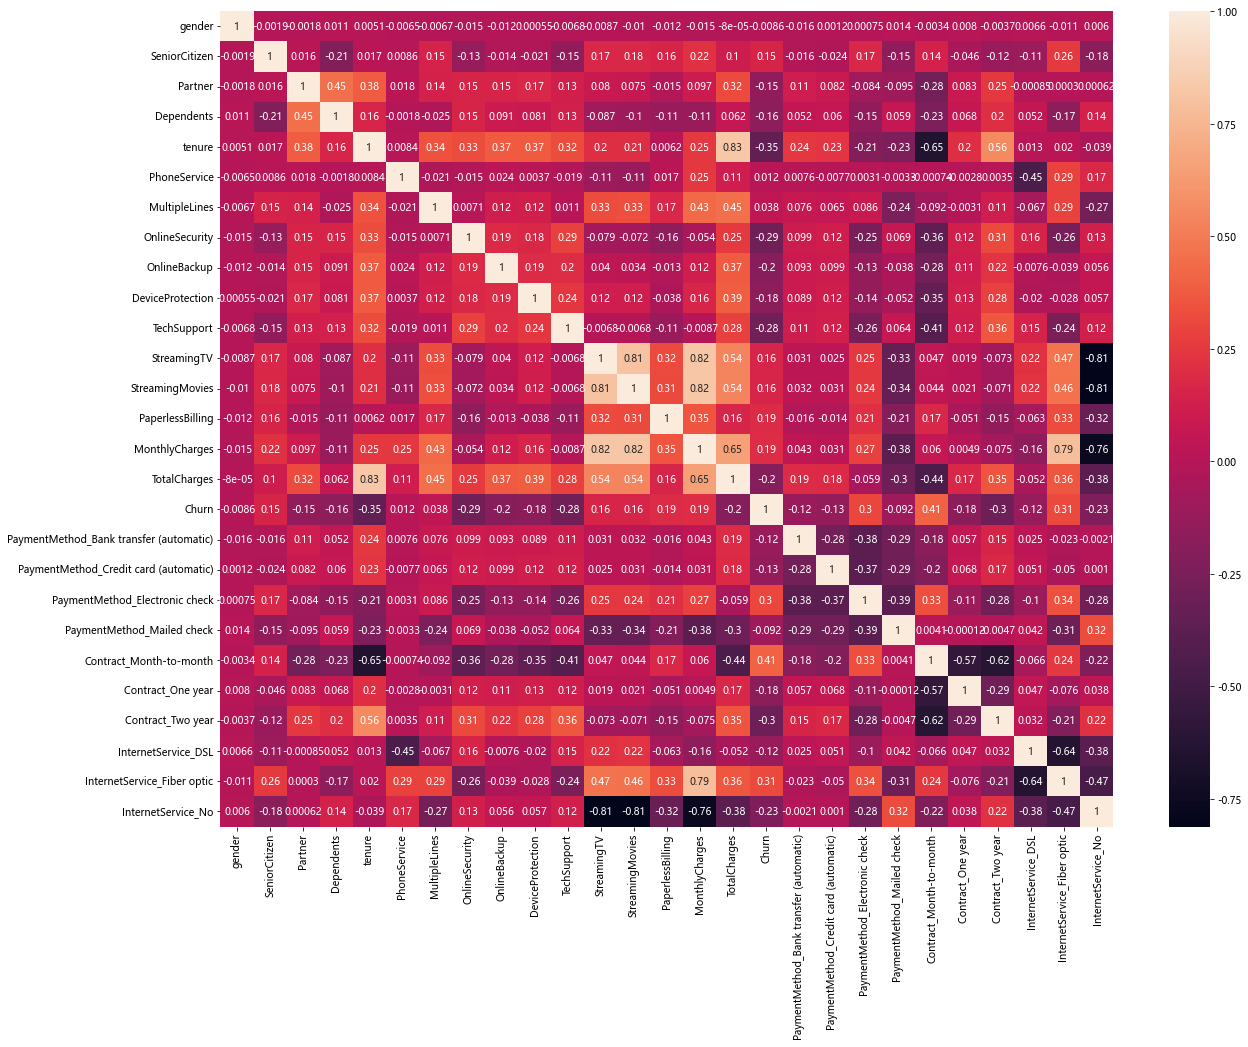

In [51]:
cormap = full.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

In [52]:
# 查看各个特征与生成情况（Survived）的相关系数，
# ascending=False表示按降序排列
corrDf['Churn'].sort_values(ascending =False)

# 正相关推测：
# Contract_Month-to-month、InternetService_Fiber optic 、
# PaymentMethod_Electronic check   
# 负相关：
#Contract_Two year 、tenure  、OnlineSecurity、 TechSupport 

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
StreamingTV                                0.164673
StreamingMovies                            0.163220
SeniorCitizen                              0.150889
MultipleLines                              0.038037
PhoneService                               0.011942
gender                                    -0.008612
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
Dependents                                -0.164221
Contract_One year                         -0.177820
DeviceProtec

In [53]:
# 特征选择
# pd.concat(),axis=1,数据集的横向合并
full_X = pd.concat( [ContractDf,#签订合同方式
                     InternetServiceDf,#网络服务
                     PaymentMethodDf,#支付方式
                     full['SeniorCitizen'],#老年用户
                     full['tenure']#在网时长
                    ] , axis=1 )

In [54]:
full_X.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure
0,1,0,0,1,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,0,0,0,1,0,34
2,1,0,0,1,0,0,0,0,0,1,0,2
3,0,1,0,1,0,0,1,0,0,0,0,45
4,1,0,0,0,1,0,0,0,1,0,0,2


In [55]:
full_X.shape

(7043, 12)

In [56]:
#原始数据集有7043行
sourceRow=7043
source_X = full_X.loc[0:sourceRow-1,:]

#原始数据集：标签
source_y = full.loc[0:sourceRow-1,'Churn']   

In [57]:
# 确定这里原始数据集取的是前7043行数据，防止后面模型报错
print(source_X.shape[0])
# 7043

7043


In [58]:
from sklearn.model_selection import train_test_split 
#建立模型用的训练数据集和测试数据集
train_X, test_X, train_y, test_y = train_test_split(source_X ,
                                                    source_y,
                                                    train_size=.8)
print('原始数据集特征：', source_X.shape, '训练数据集特征：', train_X.shape, '测试数据集特征：', test_X.shape)
print('原始数据集特征：', source_y.shape, '训练数据集特征：', train_y.shape, '测试数据集特征：', test_y.shape)

原始数据集特征： (7043, 12) 训练数据集特征： (5634, 12) 测试数据集特征： (1409, 12)
原始数据集特征： (7043,) 训练数据集特征： (5634,) 测试数据集特征： (1409,)


In [59]:
from sklearn.linear_model import LogisticRegression

#第2步：创建模型：逻辑回归（logisic regression）
model = LogisticRegression()
# 八、训练模型
model.fit( train_X , train_y )
# 分类问题，score得到的是模型的准确率
model.score(test_X , test_y )
# 返回模型的各个参数
print(model.intercept_, model.coef_)
# 模型预测
sklearn_predict = model.predict(test_X)

# 预测结果统计
pd.Series(sklearn_predict).value_counts()

[-1.15940638] [[ 0.7264298   0.09161271 -0.81357081 -0.03222775  1.03467558 -0.99797614
  -0.10885387 -0.16237435  0.36680665 -0.09110672  0.31416259 -0.03051687]]


0    1138
1     271
dtype: int64

In [60]:
# 导入第三方模块
from sklearn import metrics

# 混淆矩阵
cm = metrics.confusion_matrix(test_y, sklearn_predict, labels = [0,1])
cm

array([[951,  92],
       [187, 179]], dtype=int64)

In [61]:
Accuracy = metrics.accuracy_score(test_y, sklearn_predict)
Sensitivity = metrics.recall_score(test_y, sklearn_predict)
Specificity = metrics.recall_score(test_y, sklearn_predict, pos_label=0)
print('模型准确率为%.2f%%' %(Accuracy*100))
print('正例覆盖率为%.2f%%' %(Sensitivity*100))
print('负例覆盖率为%.2f%%' %(Specificity*100))

模型准确率为80.20%
正例覆盖率为48.91%
负例覆盖率为91.18%


In [62]:
# 模型得分
print('模型在训练集上的准确率%f' %model.score(train_X,train_y))
print('模型在测试集上的准确率%f' %model.score(test_X,test_y))
lr_acc = round(model.score(train_X,train_y) * 100, 2)
lr_acc

模型在训练集上的准确率0.794817
模型在测试集上的准确率0.801987


79.48

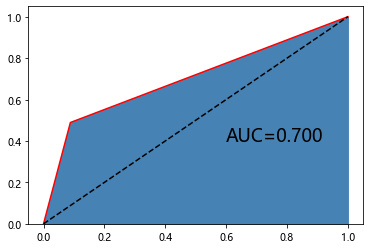

In [63]:
# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(test_y, sklearn_predict)
plt.plot(fpr, tpr, color = 'red')
plt.stackplot(fpr, tpr, color = 'steelblue')
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

In [64]:
#2、决策树模型
#构建 Decision Tree 决策树
from sklearn.tree import DecisionTreeClassifier
# 创建模型
decision_tree = DecisionTreeClassifier()
# 训练模型
decision_tree.fit(train_X, train_y)
# 模型预测
Y_pred = decision_tree.predict(test_X)

In [65]:
#模型评估
from sklearn.model_selection import GridSearchCV
from sklearn import tree
#模型得分
acc_decision_tree = round(decision_tree.score(train_X , train_y) * 100, 2)
acc_decision_tree

84.61

In [66]:
# 导入第三方模块
from sklearn import metrics
# 构建分类决策树
CART_Class = tree.DecisionTreeClassifier()
# 模型拟合
decision_tree = CART_Class.fit(train_X, train_y)
# 模型在测试集上的预测
pred = CART_Class.predict(test_X)
# 模型的准确率
print('模型在测试集的预测准确率：\n',metrics.accuracy_score(test_y, pred))

模型在测试集的预测准确率：
 0.7615330021291696


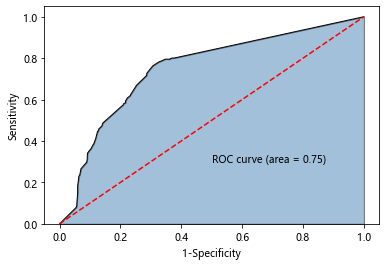

In [67]:
# 绘制ROC曲线
# 导入第三方包
import matplotlib.pyplot as plt
y_score = CART_Class.predict_proba(test_X)[:,1]
fpr,tpr,threshold = metrics.roc_curve(test_y, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [68]:
# 导入第三方包
from sklearn import ensemble
# 构建随机森林
RF_class = ensemble.RandomForestClassifier(n_estimators=200, random_state=1234)
# 随机森林的拟合
RF_class.fit(train_X, train_y)
# 模型在测试集上的预测
RFclass_pred = RF_class.predict(test_X)
# 模型的准确率
print('模型在测试集的预测准确率：\n',metrics.accuracy_score(test_y, RFclass_pred))


acc_random_forest = round(RF_class.score(train_X, train_y) * 100, 2)
acc_random_forest

模型在测试集的预测准确率：
 0.758694109297374


84.61

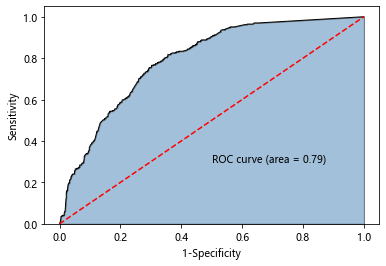

In [69]:
# 计算绘图数据
y_score = RF_class.predict_proba(test_X)[:,1]
fpr,tpr,threshold = metrics.roc_curve(test_y, y_score)
roc_auc = metrics.auc(fpr,tpr)
# 绘图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

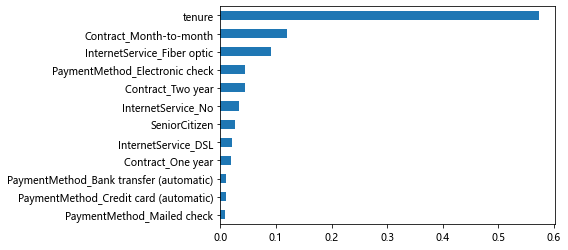

In [70]:
# 变量的重要性程度值
importance = RF_class.feature_importances_
# 构建含序列用于绘图
Impt_Series = pd.Series(importance, index = train_X.columns)
# 对序列排序绘图
Impt_Series.sort_values(ascending = True).plot(kind='barh')
plt.show()

In [71]:
# 模型在训练集的准确率
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Decision Tree','Random Forest'],
    'Score': [lr_acc,  acc_decision_tree,acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,84.61
2,Random Forest,84.61
0,Logistic Regression,79.48
